In [87]:
#importing packages,libraries and modules

#pyplot is a sub-library of matplotlib library(plotting library in Python)
#cv2 is a package
#OS module in Python provides functions for interacting with the operating system.
# sklearn-useful library for machine learning in Python
#train_test_split is a module(a file consisting of Python code)

import cv2
import os
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

Setting the Path, Images and Data

In [86]:
os.getcwd() #Gives the current Directory in which we are working in.
os.listdir("D:\DIC\Breast_Cancer_Detection\Dataset_BUSI_with_GT") #Gives the list of directories in the directory.

['benign', 'malignant', 'normal']

In [70]:
def import_images(folder,target):
    images = []
    for item in os.listdir(folder):
        img = cv2.imread(os.path.join(folder,item),0)  #cv2.imread() method loads an image from the specified file
        if img is not None:
            images.append([img,target])
    return images

In [77]:
os.getcwd()
bengin = import_images("Dataset_BUSI_with_GT/benign",0)
malignant = import_images("Dataset_BUSI_with_GT/malignant",1)
normal = import_images("Dataset_BUSI_with_GT/normal",2)
bengin

[[array([[  7,   2,   4, ..., 197, 184, 176],
         [198,  45,   0, ..., 200, 191, 183],
         [212,  45,   9, ..., 207, 203, 194],
         ...,
         [ 25,  24,  23, ...,  22,  27,  26],
         [ 24,  23,  23, ...,  30,  32,  31],
         [ 26,  25,  25, ...,  34,  34,  32]], dtype=uint8),
  0],
 [array([[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]], dtype=uint8),
  0],
 [array([[ 15,  37, 210, ..., 223, 223, 224],
         [  0,  46, 206, ..., 227, 226, 226],
         [ 14,  39, 199, ..., 217, 216, 215],
         ...,
         [ 78,  79,  80, ...,  30,  30,  31],
         [ 75,  74,  74, ...,  33,  32,  32],
         [ 65,  65,  66, ...,  31,  29,  28]], dtype=uint8),
  0],
 [array([[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ...,

In [78]:
bengin.extend(malignant) #extend adds the specified list elements (or any iterable) to the end of the current list
bengin.extend(normal)

bengin

[[array([[  7,   2,   4, ..., 197, 184, 176],
         [198,  45,   0, ..., 200, 191, 183],
         [212,  45,   9, ..., 207, 203, 194],
         ...,
         [ 25,  24,  23, ...,  22,  27,  26],
         [ 24,  23,  23, ...,  30,  32,  31],
         [ 26,  25,  25, ...,  34,  34,  32]], dtype=uint8),
  0],
 [array([[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]], dtype=uint8),
  0],
 [array([[ 15,  37, 210, ..., 223, 223, 224],
         [  0,  46, 206, ..., 227, 226, 226],
         [ 14,  39, 199, ..., 217, 216, 215],
         ...,
         [ 78,  79,  80, ...,  30,  30,  31],
         [ 75,  74,  74, ...,  33,  32,  32],
         [ 65,  65,  66, ...,  31,  29,  28]], dtype=uint8),
  0],
 [array([[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ...,

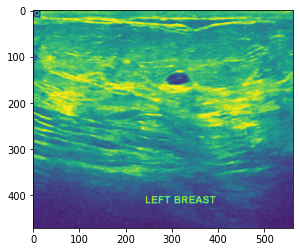

In [82]:
#imshow() function in pyplot module of matplotlib library is used to display data as an image.
plt.imshow(bengin[0][0])

In [30]:
#All the image data
full_data = bengin

In [31]:
#2-d image data in feature matrix
#Labels for the image in label

feature_matrix = []
label = []
for x,y in full_data:
    feature_matrix.append(x)
    label.append(y)

In [146]:
feature_matrix[0]

array([[  7,   2,   4, ..., 197, 184, 176],
       [198,  45,   0, ..., 200, 191, 183],
       [212,  45,   9, ..., 207, 203, 194],
       ...,
       [ 25,  24,  23, ...,  22,  27,  26],
       [ 24,  23,  23, ...,  30,  32,  31],
       [ 26,  25,  25, ...,  34,  34,  32]], dtype=uint8)

In [149]:
#Label of the 1111th image i.e Malignant
label[1111]

1

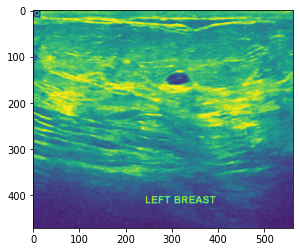

In [44]:
#Displaying the 2-d image
plt.imshow(feature_matrix[0])

In [45]:
label[0]

0

In [47]:
X=[]
img_size=128

for x in feature_matrix:
    new_array = cv2.resize(x,(img_size,img_size))
    X.append(new_array)

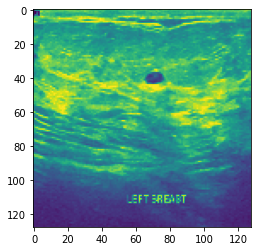

In [48]:
plt.imshow(X[0])

In [49]:
X_corrected = []
for image in X:
    image = image/255
    X_corrected.append(image)

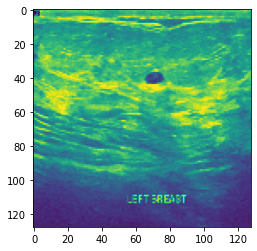

In [50]:
plt.imshow(X_corrected[0])

In [56]:
#1578 -> Total no of images
#128,128 -> Dimensions of the image

import numpy as np
np.array(X_corrected).shape

(1578, 128, 128)

In [83]:
X_M = np.array(X_corrected)
X_M.shape

(1578, 128, 128)

In [59]:
print(np.array(X_corrected).shape)
print(np.array(X_corrected).shape[0])
print(np.array(X_corrected).shape[1])
print(np.array(X_corrected).shape[2])

(1578, 128, 128)
1578
128
128


In [58]:
#Resize the X_M numpy array 1-D array
X_M_R =X_M.reshape(X_M.shape[0],X_M.shape[1],X_M.shape[2],1)

In [60]:
X_M_R.shape

(1578, 128, 128, 1)

In [84]:
X_M_R

array([[[[0.0627451 ],
         [0.65882353],
         [0.54901961],
         ...,
         [0.85490196],
         [0.81176471],
         [0.78431373]],

        [[0.04705882],
         [0.00392157],
         [0.17647059],
         ...,
         [0.76862745],
         [0.67843137],
         [0.6627451 ]],

        [[0.05882353],
         [0.00392157],
         [0.3254902 ],
         ...,
         [0.65490196],
         [0.61960784],
         [0.58431373]],

        ...,

        [[0.09019608],
         [0.09411765],
         [0.08235294],
         ...,
         [0.09803922],
         [0.08235294],
         [0.0745098 ]],

        [[0.08627451],
         [0.09411765],
         [0.08627451],
         ...,
         [0.09411765],
         [0.09803922],
         [0.08627451]],

        [[0.09019608],
         [0.09411765],
         [0.09803922],
         ...,
         [0.11764706],
         [0.09803922],
         [0.10980392]]],


       [[[0.        ],
         [0.        ],
         [0.  

Creation and Training of the model

In [129]:
X_train,X_test,y_train,y_test = train_test_split(X_M_R,label,train_size=0.70,random_state=100)

In [131]:
#importing packages,libraries and modules

import sys
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, Flatten, BatchNormalization, Conv2D, MaxPool2D
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import confusion_matrix
import itertools

In [114]:
model=Sequential([Conv2D(filters=32,kernel_size=(3,3),activation='relu',padding='same',input_shape=(128,128,1)),
Conv2D(filters=32,kernel_size=(3,3),activation='relu',padding='same',input_shape=(128,128,1)),
Conv2D(filters=32,kernel_size=(3,3),activation='relu',padding='same',input_shape=(128,128,1)),
MaxPool2D(pool_size=(2,2),strides=2),
Conv2D(filters=64,kernel_size=(3,3),activation='relu',padding='same'),
Conv2D(filters=64,kernel_size=(3,3),activation='relu',padding='same'),
Conv2D(filters=64,kernel_size=(3,3),activation='relu',padding='same'),
MaxPool2D(pool_size=(2,2),strides=2),
Flatten(),
Dense(units=3,activation='softmax')
])

In [115]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 128, 128, 32)      320       
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 128, 128, 32)      9248      
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 128, 128, 32)      9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 64, 64, 64)        18496     
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 64, 64, 64)        36928     
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 64, 64, 64)       

In [116]:
# compile function configures the Sequential model for training.
# Optimizers are algorithms or methods used to change the attributes of the neural network such as weights and learning rate to reduce the losses. Optimizers are used to solve optimization problems by minimizing the function.
# Crossentropy loss function when there are two or more label classes.
# We expect labels to be provided as integers.

model.compile(optimizer=Adam(learning_rate=0.0001),loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [117]:
# verbose=2 just specifies how much output to the console we want to see during each epoch of training. The verbosity levels range from 0 to 2, so we're getting the most verbose output.

model.fit(np.array(X_train),np.array(y_train),epochs=10,validation_data=(X_test, np.array(y_test)),verbose=2)

Epoch 1/10
35/35 - 102s - loss: 1.0034 - accuracy: 0.5525 - val_loss: 0.9427 - val_accuracy: 0.5738
Epoch 2/10
35/35 - 98s - loss: 0.9479 - accuracy: 0.5616 - val_loss: 0.9043 - val_accuracy: 0.5738
Epoch 3/10
35/35 - 94s - loss: 0.8705 - accuracy: 0.5752 - val_loss: 0.8326 - val_accuracy: 0.5696
Epoch 4/10
35/35 - 92s - loss: 0.7807 - accuracy: 0.6395 - val_loss: 0.7603 - val_accuracy: 0.6899
Epoch 5/10
35/35 - 89s - loss: 0.6854 - accuracy: 0.6966 - val_loss: 0.7019 - val_accuracy: 0.6983
Epoch 6/10
35/35 - 87s - loss: 0.6357 - accuracy: 0.7092 - val_loss: 0.7592 - val_accuracy: 0.6540
Epoch 7/10
35/35 - 85s - loss: 0.5805 - accuracy: 0.7482 - val_loss: 0.6867 - val_accuracy: 0.7068
Epoch 8/10
35/35 - 86s - loss: 0.5550 - accuracy: 0.7536 - val_loss: 0.7060 - val_accuracy: 0.7152
Epoch 9/10
35/35 - 86s - loss: 0.5166 - accuracy: 0.7708 - val_loss: 0.7241 - val_accuracy: 0.7342
Epoch 10/10
35/35 - 97s - loss: 0.4632 - accuracy: 0.8043 - val_loss: 0.7071 - val_accuracy: 0.7278


In [118]:
model.evaluate(np.array(X_test),np.array(y_test))

15/15 [==============================] - 8s 459ms/step - loss: 0.7071 - accuracy: 0.7278


[0.7070704102516174, 0.7278481125831604]

In [119]:
#To this function, we pass in the test samples x, specify a batch_size, and specify which level of verbosity we want from log messages during prediction generation. The output from the predictions won't be relevant for us, so we're setting verbose=0 for no output.
#Note that, unlike with training and validation sets, we do not pass the labels of the test set to the model during the inference stage.
#Argmax is an operation that finds the argument that gives the maximum value from a target function
# axis=-1 means that the index that will be returned by argmax will be taken from the last axis.

predicted = []
for item in model.predict(X_test,batch_size=10,verbose=0):
    predicted.append(np.argmax(item))

In [120]:
X_test.shape

(474, 128, 128, 1)

In [122]:
for item in predicted:
    print(item)

2
1
0
0
0
2
1
0
0
0
1
1
0
2
1
2
0
1
1
0
0
0
0
2
1
0
1
1
0
0
0
0
2
1
0
0
2
0
1
0
2
2
0
0
0
1
1
0
0
0
0
0
0
0
0
0
2
0
2
0
1
0
0
1
0
2
1
0
2
2
1
0
1
0
0
0
0
0
1
1
0
0
0
0
0
0
1
0
0
0
0
1
2
1
0
0
0
0
0
2
0
1
0
1
0
2
0
2
0
0
0
0
1
0
2
0
2
1
0
1
1
0
0
2
0
2
0
0
1
1
2
0
0
0
0
0
1
0
1
0
0
2
0
0
1
1
0
0
0
0
1
1
1
0
0
2
2
0
2
0
0
0
0
1
0
0
0
0
1
0
2
2
1
1
0
0
0
2
2
0
0
2
0
0
0
0
0
0
0
0
0
0
0
1
1
0
1
0
0
1
0
0
0
0
1
0
1
0
1
0
0
1
0
0
1
0
1
2
0
0
0
1
0
0
1
0
1
0
2
0
0
0
2
1
2
0
2
2
0
0
0
0
0
1
0
0
0
1
1
0
0
0
0
1
1
1
1
0
1
2
2
1
0
0
0
0
0
1
1
0
0
0
0
0
0
2
2
0
1
0
0
0
0
2
0
0
0
0
1
0
1
2
0
1
0
0
1
1
0
0
1
0
0
2
0
0
0
1
0
0
1
0
0
1
2
0
2
1
0
1
1
1
1
0
2
1
0
0
2
0
0
0
0
0
2
0
0
2
2
1
1
0
1
0
2
2
0
0
2
0
2
0
0
2
0
0
0
0
0
0
0
0
1
1
2
2
1
1
0
0
1
1
0
0
1
0
0
2
1
0
2
0
1
0
0
2
0
0
0
1
0
2
0
0
0
1
1
0
0
0
1
1
2
0
1
0
0
0
1
0
0
0
0
1
0
0
0
0
0
0
0
0
0
1
1
1
0
2
1
0
0
1
0
0
1
1
0
1
1
0
0
1
0
0
1
2
0
0
1
0
2
1
0
0
0
0
1
2
0
1
0
0
0
0
0
1
2
2
0
1
0
0
0
1


In [132]:
#Function for plotting the confusion matrix

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[218  47   7]
 [ 52  69   5]
 [ 12   6  58]]


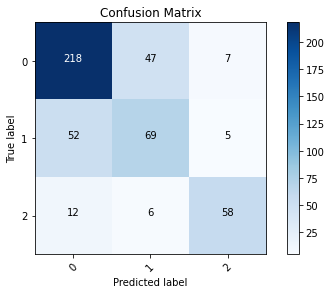

In [133]:
cm=confusion_matrix(y_true=y_test,y_pred=predicted)
cm_plot_labels=[0,1,2]
plot_confusion_matrix(cm=cm,classes=cm_plot_labels,title='Confusion Matrix')

In [134]:
X_test.shape

(474, 128, 128, 1)

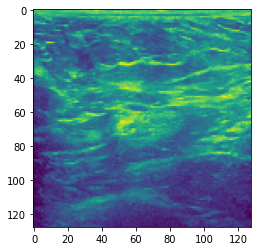

In [165]:
img = X_test[0]
plt.imshow(img)
plt.show()

Testing the prediction on a single image

In [136]:
img1=img.reshape(1,X_M.shape[1],X_M.shape[2],1)

In [137]:
img1.shape

(1, 128, 128, 1)

In [138]:
np.argmax(model.predict(img1))

2

Testing the prediction on all images and giving the outputs

In [159]:
def image_prediction(img):
    plt.imshow(img)
    img1=img.reshape(1,128,128,1)
    predict = np.argmax(model.predict(img1))
    if predict==0:
        print("The condition is normal and stable.")
    elif predict==1:
        print("Malignant tumors are cancerous. The cells can grow and spread to other parts of the body.")
    else:
        print("The cells are not yet cancerous, but they have the potential to become malignant consult the doctor")

The cells are not yet cancerous, but they have the potential to become malignant consult the doctor


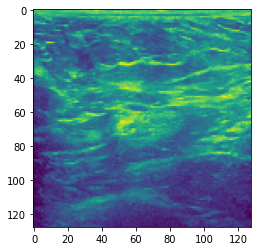

In [160]:
image_prediction(X_test[0])

The condition is normal and stable.


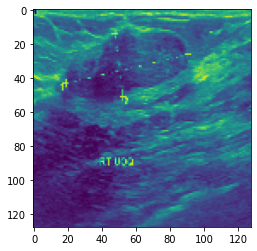

In [161]:
image_prediction(X_test[3])

The cells are not yet cancerous, but they have the potential to become malignant consult the doctor


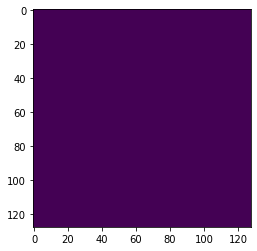

In [162]:
image_prediction(X_test[5])

Malignant tumors are cancerous. The cells can grow and spread to other parts of the body.


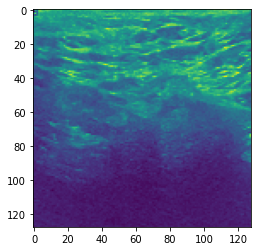

In [163]:
image_prediction(X_test[17])

The condition is normal and stable.


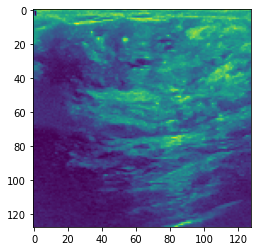

In [164]:
image_prediction(X_test[2])

In this task we took a dataset of many breast cancer images of different types and created a model for predicting each image to its specific type, by setting up the images accordingly.